# Objective: Cricket Histograms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
# Load data
data = pd.read_csv("Data/WCD_TeamS_Cricket.csv")

In [3]:
# Borrowed deviation function
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature

In [4]:
#Modified function to get set averages for plotting
def add_avg_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create columns of category means and standard deviations
    category_mean = category_gb.transform(lambda x: x.mean())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = category_mean
    X['Set' + '_Avg'] = deviation_feature


In [5]:
# Add Deviation feature
add_deviation_feature(data,'3DA','TeamSeason')

In [7]:
# Add copy of data
data2 = data.copy()

In [10]:
# Add set average feature
data2['Set'] = np.floor(data2['Leg Code'])
data2['Leg#'] = (data2['Leg Code']-data2['Set'])*10

add_avg_feature(data2,'3DA', ['Player','TrueDate','Set'])

''

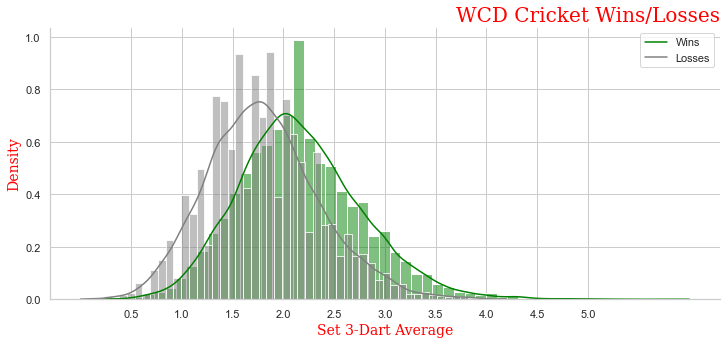

In [12]:
# All Season League Cricket Histogram with Wins/Losses split and colored
SetAvgs = data2['Set_Avg'],data2['Wins'],data2['Player'],data2['Team']
WinAvs = SetAvgs[0].where(SetAvgs[1] == True)
LossAvs = SetAvgs[0].where(SetAvgs[1] == False)

sns.set_theme(style="whitegrid",
              palette = sns.color_palette("Spectral"))

f, ax = plt.subplots(figsize=(12, 5))
sns.despine(f)

sns.histplot(WinAvs, bins=55, color = 'g',
             stat = 'density', 
             kde = True,
            )
sns.histplot(LossAvs, bins=55, color = 'grey',
             stat = 'density',
             kde = True,
            )

plt.title('WCD Cricket Wins/Losses',family='serif',fontsize = 20,
          loc='right',color='r')

plt.xlabel('Set 3-Dart Average',fontsize = 14,family='serif', color='r')
plt.ylabel('Density',fontsize = 14,family='serif', color='r')
plt.legend(['Wins','Losses'], loc = 0);
;

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.savefig('WCD_Cricket_gr.png')
;

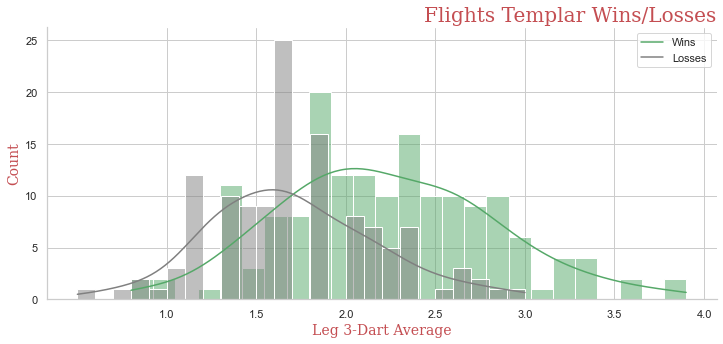

In [201]:
# All Season Flights Templar Cricket Histogram with Wins/Losses split and colored

SetAvgs = data2['3DA'],data2['Wins'],data2['Player'],data2['Team']
FTWins = SetAvgs[0].where((SetAvgs[3] == 'Flights Templar')
                         & (SetAvgs[1] == True))
FTLoss = SetAvgs[0].where((SetAvgs[3] == 'Flights Templar')
                         & (SetAvgs[1] == False))

sns.set_theme(style="whitegrid",
              palette = sns.color_palette("Spectral"))

f, ax = plt.subplots(figsize=(12, 5))
sns.despine(f)

sns.histplot(FTWins, bins=25, color = 'g',
             #stat = 'density',
             kde = True,
            )
sns.histplot(FTLoss, bins=25, color = 'grey',
             #stat = 'density',
             kde = True,
            )
plt.title('Flights Templar Wins/Losses',family='serif',fontsize = 20,
          loc='right',color='r')
plt.xlabel('Leg 3-Dart Average',fontsize = 14,family='serif', color='r')
plt.ylabel('Count',fontsize = 14,family='serif', color='r')
plt.legend(['Wins','Losses'], loc = 0);
;

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 1.5, 2, 2.5, 3, 3.5, 4]);
#plt.savefig('FT_Cricket.png')

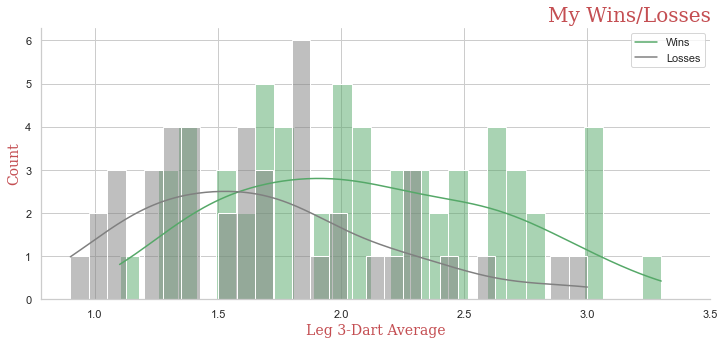

In [202]:
# All Season Personal Cricket Histogram with Wins/Losses split and colored

SetAvgs = data2['3DA'],data2['Wins'],data2['Player'],data2['Team'],data2['TrueDate']
FTWins = SetAvgs[0].where((SetAvgs[2] == 'Will Moore')
                         & (SetAvgs[1] == True))
                         #& (SetAvgs[4] >= '10/1/19'))

FTLoss = SetAvgs[0].where((SetAvgs[2] == 'Will Moore')
                         & (SetAvgs[1] == False))
                         #& (SetAvgs[4] >= '10/1/19'))

sns.set_theme(style="whitegrid",
              palette = sns.color_palette("Spectral"))

f, ax = plt.subplots(figsize=(12, 5))
sns.despine(f)

sns.histplot(FTWins, bins=28, color = 'g',
             #stat = 'density',
             kde = True,
            )
sns.histplot(FTLoss, bins=28, color = 'grey',
             #stat = 'density',
             kde = True,
            )
plt.title('My Wins/Losses',family='serif',fontsize = 20,
          loc='right',color='r')
plt.xlabel('Leg 3-Dart Average',fontsize = 14,family='serif', color='r')
plt.ylabel('Count',fontsize = 14,family='serif', color='r')
plt.legend(['Wins','Losses'],loc = 0);
;

ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 1.5, 2, 2.5, 3, 3.5]);
#plt.savefig('Will_Cricket.png')